# JPMC QR Mentorship Case Study 2
## Khushmeet Chandi

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

## Question 1: Probability & Monte Carlo Simulation

Consider a company XYZ Capital currently trading at \\$100 at time t0 on the National Stock Exchange of Vol-land. The stock price moves up by \\$1 or down by \\$1 with equal probability at each minute.

a) What will be the expected value of stock price after:

i) 1 minute

ii) 10 minutes

iii) 1 hour

iv) 1 month

Are all the values same? Please explain on why they should or should not be same

### Solution for Question 1, Part A
Intuitively, the expected value after each of the following durations will be \\$100. This is because the stock of XYZ Capital moves up by $1 and down by $1 with equal probability of 50\% at each minute. The expected value of the stock price is the long-term average value of that variable and at each minute the the average movement of the stock price is +\\$0 since (.5)\*(-1) + (.5\*1) = 0. We can spell out these calculations analytically as follows:


#### i) 1 Minute

After 1 minute, the stock price can either be \( 100 + 1 = 101 \) or \( 100 - 1 = 99 \). Both outcomes are equally likely.

The expected value $$E(S_1)$$ is calculated as:

$$
E(S_1) = \frac{1}{2} \times (100 + 1) + \frac{1}{2} \times (100 - 1)
$$

$$
E(S_1) = \frac{1}{2} \times 101 + \frac{1}{2} \times 99
$$

$$
E(S_1) = \frac{101 + 99}{2}
$$

$$
E(S_1) = 100
$$

So, after 1 minute, the expected stock price is \\$100.

#### ii) 10 Minutes

Since there is equal probability of moving up or down 1 unit, the expected value of the stock price does not change over time. This is due to the symmetry of the random walk.
1. **Initial Condition:**

   At time $$t = 0 $$ the stock price is $$ S_0 = 100$$ in dollars. 

2. **Stock Price Movement:**

   At each minute, the stock price can either increase by \\$1 or decrease by \\$1 with equal probability (50%).

   - If the stock price increases by \\$1, it becomes $$ S_{t + 1} $$.
   - If the stock price decreases by \\$1, it becomes $$ S_{t - 1} $$.

3. **Expected Value Calculation for Each Minute:**

   Let $$ E(S_t) $$ denote the expected stock price at time \( t \). 

   At time \( t = 0 \), the expected value is:
   $$
   E(S_0) = 100
   $$

   After 1 minute, the stock price $$ S_1 $$ can be either \( 100 + 1 = 101 \) or \( 100 - 1 = 99 \), each with a probability of 0.5. Thus:
   $$
   E(S_1) = \frac{1}{2} \times 101 + \frac{1}{2} \times 99 = \frac{101 + 99}{2} = 100
   $$

4. **General Case for Multiple Minutes:**

   Since the probabilities of moving up or down are equal, the expected value of the stock price at any future time \( t \) remains the same as at time \( t = 0 \). This can be generalized as:
   $$
   E(S_t) = 100
   $$

   This is because the expected change in stock price in each minute is zero, as the movements are symmetric.

5. **Conclusion for 10 Minutes:**

   Therefore, after 10 minutes, the expected stock price is still:
   $$
   E(S_{10}) = 100
   $$

The symmetry implies that over any number of minutes, including 10 minutes, the expected value of the stock price remains constant at $100.


#### iii) 1 Hour

Assuming there are 60 minutes in an hour, the expected value of the stock price after 1 hour (60 minutes) is also:

$$
E(S_{60}) = 100
$$

#### iv) 1 Month

Assuming there are 43,200 minutes in a month, the expected value of the stock price after 1 month is also:

$$
E(S_{43200}) = 100
$$

We can also perform a Monte Carlo Simulation for this

In [5]:
initial_price = 100
num_simulations = 1000

def simulate_price_change(minutes):
    return np.random.choice([initial_price + 1, initial_price - 1], size=num_simulations)

prices_1_minute = simulate_price_change(1)
expected_price_1_minute = np.mean(prices_1_minute)
print(f"Expected stock price after 1 minute: ${expected_price_1_minute:.2f}")

prices_1_minute = simulate_price_change(1)
expected_price_1_minute = np.mean(prices_1_minute)
print(f"Expected stock price after 10 minutes: ${expected_price_1_minute:.2f}")

prices_1_minute = simulate_price_change(60)
expected_price_1_minute = np.mean(prices_1_minute)
print(f"Expected stock price after 1 hour: ${expected_price_1_minute:.2f}")

prices_1_minute = simulate_price_change(42300)
expected_price_1_minute = np.mean(prices_1_minute)
print(f"Expected stock price after 1 month (assuming 43200 min in a month): ${expected_price_1_minute:.2f}")

Expected stock price after 1 minute: $100.06
Expected stock price after 10 minutes: $99.99
Expected stock price after 1 hour: $100.05
Expected stock price after 1 month (assuming 43200 min in a month): $99.97


b) What will the probability of the stock price going to \\$102 before going to \\$96,

i) Solve the probability analytically.

ii) Find the probability using Monte Carlo method. How many paths will get you to the converged value? Plot the estimated Value vs Number of Paths

To find the probability that the stock price will reach \\$102 before \\$96, starting from \\$100, we can use the concept of first passage probabilities in a symmetric random walk.

### Solution for Question 1, Part B


#### i) Solving analytically

1. **Initialize:**

   Let $p_i$ be the probability of reaching \\$102 before \\$96 when starting at price $i$.

   - We know:
   
     $
     p_{102} = 1$ if we start at \\$102, we have already reached it
     
     $p_{96} = 0$ if we start at \\$96, we have reached \\$96 before \\$102

2. **Recursive Equation:**

   For any price $i$ between \\$96 and \\$102, the probability $p_i$ satisfies:
   $
   p_i = \frac{1}{2} p_{i+1} + \frac{1}{2} p_{i-1}
   $

3. **Solve the Recurrence:**

   The general solution to the recurrence relation is of the form $p_i = A + B * i$.
   
  Using boundary conditions:
   - At $i = 102$:
     $$
     p_{102} = A + B \cdot 102 = 1
     $$
   - At $i = 96$:
     $$
     p_{96} = A + B \cdot 96 = 0
     $$

   Solving these equations:
   - Subtract the second from the first:
     $$
     B \cdot (102 - 96) = 1 - 0
     $$
     $$
     B = \frac{1}{6}
     $$

   - Substitute $B$ back into one of the boundary equations:
     $$
     A + \frac{1}{6} \cdot 96 = 0
     $$
     $$
     A = -16
     $$

   - Therefore:
     $$
     p_i = -16 + \frac{1}{6} i
     $$

   - For $i = 100$:
     $$
     p_{100} = -16 + \frac{1}{6} \cdot 100 = -16 + \frac{100}{6} = -16 + 16.67 = 0.67
     $$

   So, the probability of reaching \\$102 before \\$96 starting from \\$100 is approximately $\frac{2}{3}$ or about 0.67.
  
#### ii) Solving with Monte Carlo Simulation


Estimated Probability: 0.66


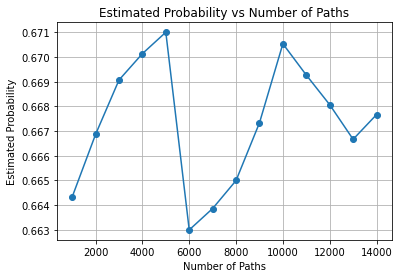

In [11]:
# Parameters
initial_price = 100
target_high = 102
target_low = 96
num_simulations = 15000
max_steps = 10000

def monte_carlo_simulation():
    count_reached_high = 0
    for _ in range(num_simulations):
        price = initial_price
        for _ in range(max_steps):
            if price >= target_high:
                count_reached_high += 1
                break
            if price <= target_low:
                break
            price += np.random.choice([1, -1])
    return count_reached_high / num_simulations

# Estimate probability
estimated_probability = monte_carlo_simulation()
print(f"Estimated Probability: {estimated_probability:.2f}")

# For plotting
def estimate_probability_vs_paths(path_counts):
    probabilities = [monte_carlo_simulation() for _ in path_counts]
    plt.plot(path_counts, probabilities, marker='o')
    plt.xlabel('Number of Paths')
    plt.ylabel('Estimated Probability')
    plt.title('Estimated Probability vs Number of Paths')
    plt.grid(True)
    plt.show()

# Generate path counts for plotting
path_counts = np.arange(1000, num_simulations, 1000)
estimate_probability_vs_paths(path_counts)


## Question 2: Pricing a Call Option analytically using Black Scholes formula

Consider a company “XYZ capital” currently trading at $200 (at time = t0) on the National Stock Exchange of Vol-land. We have a call option contract with the following parameters:

1) Strike: $180

2) Time To expiration: 30 days (1/12th of a year)

3) Implied Vol: 15%

4) Interest Rate: 2%

5) Current Stock Price: $200

Compute the value of the above-described option contract using Black Scholes formula. Please write a generic function to calculate Black-Scholes price and call the function with the inputs above.

In [7]:
def black_scholes_call(S0, K, T, sigma, r):
    """
    Calculate the Black-Scholes price of a call option.

    Parameters:
    S0 (float): Current stock price
    K (float): Strike price
    T (float): Time to expiration (in years)
    sigma (float): Volatility of the stock price
    r (float): Risk-free interest rate

    Returns:
    float: Call option price
    """
    
    # Calculate d1 and d2
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Calculate the call option price
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    return call_price

# Parameters
S0 = 200       # Current stock price
K = 180        # Strike price
T = 30 / 365   # Time to expiration (in years)
sigma = 0.15   # Volatility
r = 0.02       # Risk-free interest rate

# Calculate the call option price
call_price = black_scholes_call(S0, K, T, sigma, r)
print(f"The Black-Scholes price of the call option is: ${call_price:.2f}")

The Black-Scholes price of the call option is: $20.31


## Question 3: Pricing a Call Option using Monte Carlo Simulation

As we discussed above the price of an option should be the present value of expected payoff of the option. Now consider a case where we know how the underlying asset moves with time and we also know how to compute the payoff of an option.

a) Please write a function to compute the price of a call option with the same parameters in Question 3 but using Monte Carlo simulation techniques.

b) Plot the price of the option vs number of paths.

Number of Paths: 100, Call Option Price: $21.21
Number of Paths: 200, Call Option Price: $19.83
Number of Paths: 500, Call Option Price: $20.20
Number of Paths: 1000, Call Option Price: $20.02
Number of Paths: 2000, Call Option Price: $20.58


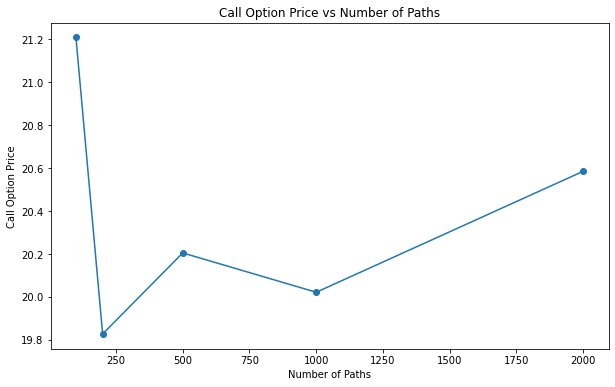

In [8]:
def monte_carlo_call_price(S0, K, T, sigma, r, N, M):
    """
    Calculate the call option price using Monte Carlo simulation.

    Parameters:
    S0 (float): Current stock price
    K (float): Strike price
    T (float): Time to expiration (in years)
    sigma (float): Volatility of the stock price
    r (float): Risk-free interest rate
    N (int): Number of paths
    M (int): Number of time steps per path

    Returns:
    float: Call option price
    """
    dt = T / M
    call_prices = []

    for _ in range(N):
        # Simulate one path
        S = S0
        path = [S0]
        for _ in range(M):
            Z = np.random.normal(0, 1)
            S = S * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
            path.append(S)
        
        # Compute the payoff at maturity
        payoff = max(path[-1] - K, 0)
        call_prices.append(payoff)
    
    # Compute the discounted average of the payoffs
    call_price = np.exp(-r * T) * np.mean(call_prices)
    return call_price

# Parameters
S0 = 200       # Current stock price
K = 180        # Strike price
T = 30 / 365   # Time to expiration (in years)
sigma = 0.15   # Volatility
r = 0.02       # Risk-free interest rate
M = 240        # Number of time steps per path

# Number of paths to test
path_numbers = [100, 200, 500, 1000, 2000]
prices = []

# Compute option price for varying numbers of paths
for N in path_numbers:
    price = monte_carlo_call_price(S0, K, T, sigma, r, N, M)
    prices.append(price)
    print(f"Number of Paths: {N}, Call Option Price: ${price:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(path_numbers, prices, marker='o')
plt.xlabel('Number of Paths')
plt.ylabel('Call Option Price')
plt.title('Call Option Price vs Number of Paths')
plt.show()